In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, cheb2prefs
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = Model(loadPath = "savedModels/airy-theta-5")

Metal device set to: Apple M1 Pro


In [3]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 513 ms, sys: 119 ms, total: 632 ms
Wall time: 521 ms


In [4]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     46       [0.005329 0.001847 0.000365 0.001787]
vertical scale = 0.005329

In [5]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [6]:
%%time
Gneural = model.evaluateG(x,y)

# plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
# plt.colorbar()

CPU times: user 170 ms, sys: 358 ms, total: 528 ms
Wall time: 881 ms


CPU times: user 1.79 s, sys: 2.34 s, total: 4.13 s
Wall time: 1.42 s


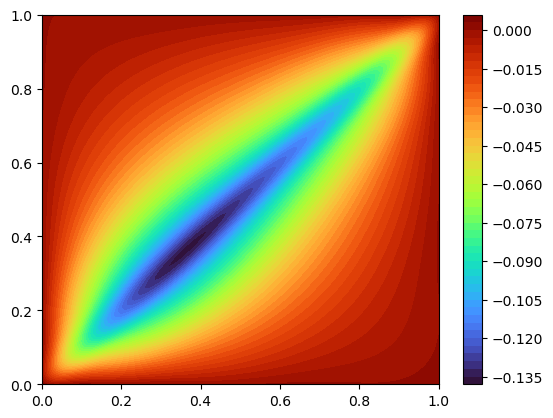

In [7]:
%%time
G = g[x,y]

plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [ ]:
%%time
U, S, V = g.svd()